In [1]:

import json
import torch

# Load vocabulary mappings (ensure one-time loading)
with open("word_to_index.json", "r") as f:
    word_to_index = json.load(f)


with open("index_to_word.json", "r") as f:
    index_to_word = json.load(f)
    index_to_word = {int(k): v for k, v in index_to_word.items()}


vocab_size = len(word_to_index)  # Make sure it matches training vocab size

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F


# Define the improved MLP model
class ImprovedMLP(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, dropout_rate, context_size, activation_function):
        super(ImprovedMLP, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * context_size, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, vocab_size)
        self.activation_function = activation_function

    def forward(self, x):
        x = self.embedding(x).view(x.size(0), -1)
        x = self.dropout1(self.activation_function(self.bn1(self.fc1(x))))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


embedding_dim = 32
hidden_dim = 1024
dropout_rate = 0.3
context_size = 5
activation_function = nn.LeakyReLU()
model = ImprovedMLP(vocab_size, embedding_dim,hidden_dim, dropout_rate, context_size, activation_function)

# Example loading for a PyTorch model
model_path = "models/model_context_5_emb_32_act_leaky_relu_seed_42.pth"
# Load the state dictionary
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
model.eval()

# Extract embeddings
embedding_layer = model.embedding.weight.detach().cpu().numpy


In [3]:
!pip install pandas

In [4]:
# Extract embeddings as a PyTorch tensor
embedding_layer = model.embedding.weight.detach().cpu()

# Confirm the type and view the shape
print("Type of embedding_layer:", type(embedding_layer))
print("Shape of embedding_layer:", embedding_layer.shape)
print("First few entries of the embedding layer:", embedding_layer[:5])


Type of embedding_layer: <class 'torch.Tensor'>
Shape of embedding_layer: torch.Size([14343, 32])
First few entries of the embedding layer: tensor([[ 0.1607, -0.8831,  0.9053,  0.3046,  1.1314, -0.0213,  0.0537, -1.3349,
         -0.3744,  1.6580, -0.4364,  0.9736, -0.0852, -1.8226,  0.0389,  0.8106,
          1.3936, -1.3252, -0.4490, -0.1550, -0.0816,  1.4668,  0.7676,  0.6426,
          0.9667,  2.3175, -1.0444, -0.4604, -1.4124,  0.2381,  0.3254,  0.7909],
        [-1.9379,  1.2617,  1.4001,  0.5934, -1.6363,  0.1354,  0.5916,  3.0951,
          2.2618,  0.7057,  0.2028, -1.7554,  0.9461,  0.0473, -0.2410, -0.4252,
         -0.4355,  0.5923,  2.8197,  0.5316, -1.4165,  1.7443, -1.1300,  1.0919,
          0.1573, -0.7654, -0.7492,  2.1439,  0.8276, -0.5683, -1.9366, -1.9796],
        [ 1.4292, -0.9563,  2.4447, -0.4073, -1.9755, -2.1960, -1.1864,  0.7653,
         -0.7518, -1.6341, -1.0671,  1.1376,  1.8026, -0.4890, -4.2620, -1.3836,
         -0.9479,  1.3315,  1.4379,  1.1982,  1.

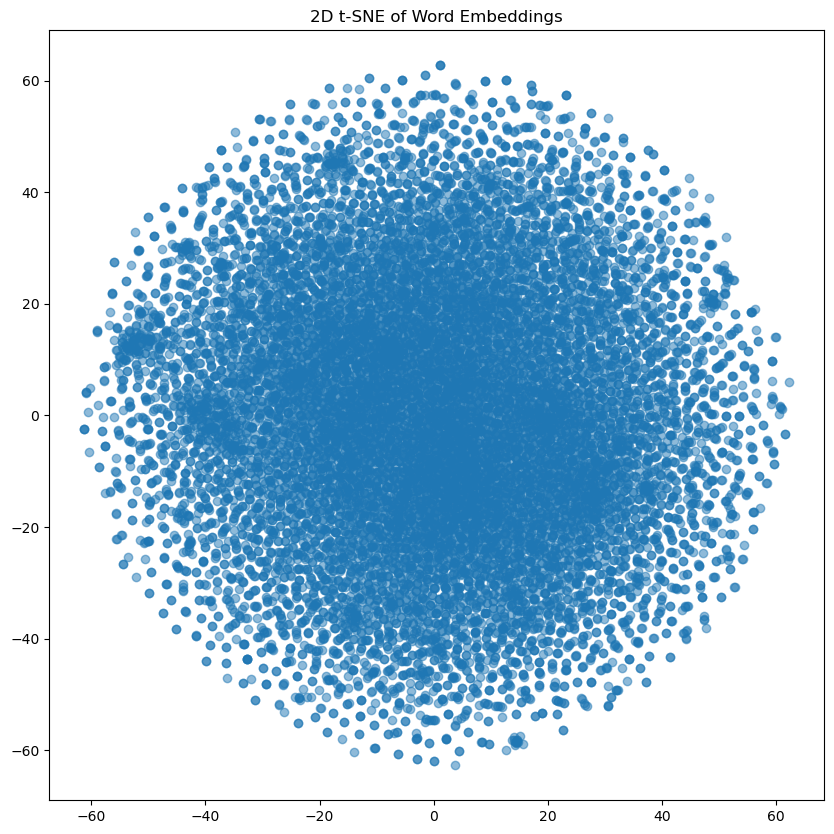

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce embedding dimensionality
tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(embedding_layer.cpu())

# Plot embeddings
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)
plt.title("2D t-SNE of Word Embeddings")
plt.show()


In [11]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px

# Example vocabulary and selected words to visualize
vocab = list(word_to_index.keys())
selected_words = ['recipe', 'ingredients', 'flavor', 'spice', 'sweet']

# Get the indices of the selected words for labeling
selected_indices = [word_to_index[word] for word in selected_words if word in word_to_index]

# Convert the embedding layer to a NumPy array and use the entire vocabulary for t-SNE
all_embeddings = embedding_layer.cpu().numpy()

# Apply t-SNE in 3D on the entire vocabulary's embeddings
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)  # Perplexity is set below len(vocab)
reduced_embeddings_3d = tsne_3d.fit_transform(all_embeddings)

# Prepare labels where only selected words are labeled
labels = [vocab[idx] if idx in selected_indices else '' for idx in range(len(vocab))]

# Plot in 3D using Plotly, with labels for the selected words
fig = px.scatter_3d(
    x=reduced_embeddings_3d[:, 0],
    y=reduced_embeddings_3d[:, 1],
    z=reduced_embeddings_3d[:, 2],
    text=labels,  # Labels only for selected words
    title="3D t-SNE Visualization of Word Embeddings"
)

fig.update_traces(marker=dict(size=3))
fig.show()


ValueError: All arguments should have the same length. The length of argument `text` is 5, whereas the length of  previously-processed arguments ['x', 'y', 'z'] is 14343

In [13]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px

# Example vocabulary and selected words to visualize
vocab = list(word_to_index.keys())
selected_words = ['recipe', 'ingredients', 'flavor', 'spice', 'sweet']

# Get the indices of the selected words for labeling
selected_indices = [word_to_index[word] for word in selected_words if word in word_to_index]

# Convert the embedding layer to a NumPy array and use the entire vocabulary for t-SNE
all_embeddings = embedding_layer.cpu().numpy()

# Apply t-SNE in 3D on the entire vocabulary's embeddings
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)  # Perplexity is set below len(vocab)
reduced_embeddings_3d = tsne_3d.fit_transform(all_embeddings)

# Prepare labels where only selected words are labeled
labels = [vocab[idx] if idx in selected_indices else '' for idx in range(len(vocab))]

# Plot in 3D using Plotly, with labels for the selected words
fig = px.scatter_3d(
    x=reduced_embeddings_3d[:, 0],
    y=reduced_embeddings_3d[:, 1],
    z=reduced_embeddings_3d[:, 2],
    text=labels,  # Labels only for selected words
    title="3D t-SNE Visualization of Word Embeddings"
)

fig.update_traces(marker=dict(size=3))
fig.show()

ValueError: All arguments should have the same length. The length of argument `text` is 5, whereas the length of  previously-processed arguments ['x', 'y', 'z'] is 14343

Type of embedding_layer: <class 'torch.Tensor'>
Shape of embedding_layer: torch.Size([14343, 32])
First few entries of the embedding layer: tensor([[ 0.1607, -0.8831,  0.9053,  0.3046,  1.1314, -0.0213,  0.0537, -1.3349,
         -0.3744,  1.6580, -0.4364,  0.9736, -0.0852, -1.8226,  0.0389,  0.8106,
          1.3936, -1.3252, -0.4490, -0.1550, -0.0816,  1.4668,  0.7676,  0.6426,
          0.9667,  2.3175, -1.0444, -0.4604, -1.4124,  0.2381,  0.3254,  0.7909],
        [-1.9379,  1.2617,  1.4001,  0.5934, -1.6363,  0.1354,  0.5916,  3.0951,
          2.2618,  0.7057,  0.2028, -1.7554,  0.9461,  0.0473, -0.2410, -0.4252,
         -0.4355,  0.5923,  2.8197,  0.5316, -1.4165,  1.7443, -1.1300,  1.0919,
          0.1573, -0.7654, -0.7492,  2.1439,  0.8276, -0.5683, -1.9366, -1.9796],
        [ 1.4292, -0.9563,  2.4447, -0.4073, -1.9755, -2.1960, -1.1864,  0.7653,
         -0.7518, -1.6341, -1.0671,  1.1376,  1.8026, -0.4890, -4.2620, -1.3836,
         -0.9479,  1.3315,  1.4379,  1.1982,  1.

In [15]:
import json
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
import os

# Load vocabulary mappings (ensure one-time loading)
with open("word_to_index.json", "r") as f:
    word_to_index = json.load(f)

with open("index_to_word.json", "r") as f:
    index_to_word = json.load(f)
    index_to_word = {int(k): v for k, v in index_to_word.items()}

vocab_size = len(word_to_index)  # Make sure it matches training vocab size

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the improved MLP model
class ImprovedMLP(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, dropout_rate, context_size, activation_function):
        super(ImprovedMLP, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * context_size, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, vocab_size)
        self.activation_function = activation_function

    def forward(self, x):
        x = self.embedding(x).view(x.size(0), -1)
        x = self.dropout1(self.activation_function(self.bn1(self.fc1(x))))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Set model parameters
embedding_dim = 32
hidden_dim = 1024
dropout_rate = 0.3
context_size = 5
activation_function = nn.LeakyReLU()
model = ImprovedMLP(vocab_size, embedding_dim, hidden_dim, dropout_rate, context_size, activation_function)

# Load the model's state dictionary
model_path = "models/model_context_5_emb_32_act_leaky_relu_seed_42.pth"
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Extract embeddings as a PyTorch tensor
embedding_layer = model.embedding.weight.detach().cpu()

# Apply 3D t-SNE to visualize embeddings
selected_words = ['recipe', 'ingredients', 'flavor', 'spice', 'sweet']
selected_indices = [word_to_index[word] for word in selected_words if word in word_to_index]

# Convert the embedding layer to a NumPy array for t-SNE
all_embeddings = embedding_layer.numpy()

# Apply t-SNE in 3D
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
reduced_embeddings_3d = tsne_3d.fit_transform(all_embeddings)

# Limit number of labels for clarity by selecting a random subset of indices to label
np.random.seed(42)
sampled_indices = np.random.choice(selected_indices, size=min(3, len(selected_indices)), replace=False)
labels = [index_to_word[idx] if idx in sampled_indices else '' for idx in range(len(index_to_word))]

# Plot in 3D using Plotly with reduced marker size and smaller text size for annotations
fig = px.scatter_3d(
    x=reduced_embeddings_3d[:, 0],
    y=reduced_embeddings_3d[:, 1],
    z=reduced_embeddings_3d[:, 2],
    text=labels,
    title="3D t-SNE Visualization of Word Embeddings"
)

fig.update_traces(marker=dict(size=2), textfont=dict(size=10))  # Smaller dots and text font size
fig.show()


In [16]:
import json
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
import os

# Load vocabulary mappings (ensure one-time loading)
with open("word_to_index.json", "r") as f:
    word_to_index = json.load(f)

with open("index_to_word.json", "r") as f:
    index_to_word = json.load(f)
    index_to_word = {int(k): v for k, v in index_to_word.items()}

vocab_size = len(word_to_index)  # Make sure it matches training vocab size

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the improved MLP model
class ImprovedMLP(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, dropout_rate, context_size, activation_function):
        super(ImprovedMLP, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * context_size, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, vocab_size)
        self.activation_function = activation_function

    def forward(self, x):
        x = self.embedding(x).view(x.size(0), -1)
        x = self.dropout1(self.activation_function(self.bn1(self.fc1(x))))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Set model parameters
embedding_dim = 32
hidden_dim = 1024
dropout_rate = 0.3
context_size = 5
activation_function = nn.LeakyReLU()
model = ImprovedMLP(vocab_size, embedding_dim, hidden_dim, dropout_rate, context_size, activation_function)

# Load the model's state dictionary
model_path = "models/model_context_5_emb_32_act_leaky_relu_seed_42.pth"
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Extract embeddings as a PyTorch tensor
embedding_layer = model.embedding.weight.detach().cpu()

# Apply 3D t-SNE to visualize embeddings
selected_words = ['recipe', 'ingredients', 'flavor', 'spice', 'sweet']
selected_indices = [word_to_index[word] for word in selected_words if word in word_to_index]

# Convert the embedding layer to a NumPy array for t-SNE
all_embeddings = embedding_layer.numpy()

# Apply t-SNE in 3D
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
reduced_embeddings_3d = tsne_3d.fit_transform(all_embeddings)

# Limit number of labels for clarity by selecting a random subset of indices to label
np.random.seed(42)
sampled_indices = np.random.choice(selected_indices, size=min(3, len(selected_indices)), replace=False)
labels = [index_to_word[idx] if idx in sampled_indices else '' for idx in range(len(index_to_word))]

# Plot in 3D using Plotly with reduced marker size and smaller text size for annotations
fig = px.scatter_3d(
    x=reduced_embeddings_3d[:, 0],
    y=reduced_embeddings_3d[:, 1],
    z=reduced_embeddings_3d[:, 2],
    text=labels,
    title="3D t-SNE Visualization of Word Embeddings"
)

fig.update_traces(marker=dict(size=2), textfont=dict(size=10))  # Smaller dots and text font size
fig.show()
